# Individual Assignment

Starting with the list of imports and define risk-free rate and trading days.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from scipy.optimize import minimize

plt.style.use("ggplot")

RFR = 0.0441
TRADING_DAYS = 252

## Data Retrieval

Importing daily historical data from Yahoo Finance using `yf.download`, save it as `.csv` file and import save as `.csv`. A list of ten stocks was chosen, this includes the magnificent 7, MicroStrategy, JP Morgan and Bank of America, covering the period from January 1, 2020 to December 31, 2024.

In [17]:
tickers = ["AAPL", "MSFT", "AMZN", "META", "TSLA", "NVDA", "GOOGL", "MSTR", "JPM", "BAC"]
groups = []

for ticker in tickers:
    data = yf.download(ticker, start="2020-01-01", end="2024-12-31", auto_adjust=False, progress=False)
    data.to_csv('ten_stocks_2020_2024.csv')
    data = pd.read_csv('ten_stocks_2020_2024.csv', header=[0,1], index_col=0, parse_dates=True)
    data.columns = data.columns.droplevel(1)
    data.insert(0, "Ticker", ticker)
    groups.append(data)

df = pd.concat(groups)
df

Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,AAPL,72.620834,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,AAPL,71.914818,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,AAPL,72.487846,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,AAPL,72.146919,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,AAPL,73.307518,75.797501,76.110001,74.290001,74.290001,132079200
...,...,...,...,...,...,...,...
2024-12-23,BAC,43.359245,43.889999,44.110001,42.779999,43.900002,35374800
2024-12-24,BAC,43.843319,44.380001,44.419998,43.930000,43.930000,12054400
2024-12-26,BAC,44.011265,44.549999,44.580002,44.110001,44.209999,16077400


### Data Cleaning

To check if the DataFrame has duplicates:

In [18]:
print(f"The number of duplicate rows: {df.duplicated().sum()}")

The number of duplicate rows: 0


Check for missing values in the DataFrame:

In [19]:
print(f"The number of missing values: {df.isnull().sum().sum()}")


The number of missing values: 0


Since there are no duplicate and missing data, the DataFrame is cleaned.

## Data Exploration

Head and tail of the wide data frame that shows the closing price for each stock.

In [20]:
df.shape
pivot_df = df.pivot_table(index=df.index, columns="Ticker", values="Close")

print("Head of dataframe of closing prices")
display(pivot_df.head())

print("Tail of dataframe of closing prices")
display(pivot_df.tail())

Head of dataframe of closing prices


Ticker,AAPL,AMZN,BAC,GOOGL,JPM,META,MSFT,MSTR,NVDA,TSLA
Date,,,,,,,,,,
2020-01-02,75.087502,94.900497,35.639999,68.433998,141.089996,209.779999,160.619995,14.431,5.99775,28.684000
2020-01-03,74.357498,93.748497,34.900002,68.075996,138.339996,208.669998,158.619995,14.357,5.90175,29.534000
2020-01-06,74.949997,95.143997,34.849998,69.890503,138.229996,212.600006,159.029999,14.425,5.92650,30.102667
2020-01-07,74.597504,95.343002,34.619999,69.755501,135.880005,213.059998,157.580002,14.387,5.99825,31.270666
2020-01-08,75.797501,94.598503,34.970001,70.251999,136.940002,215.220001,160.089996,14.371,6.00950,32.809334


Tail of dataframe of closing prices


Ticker,AAPL,AMZN,BAC,GOOGL,JPM,META,MSFT,MSTR,NVDA,TSLA
Date,,,,,,,,,,
2024-12-23,255.270004,225.059998,43.889999,194.630005,238.389999,599.849976,435.250000,332.230011,139.669998,430.600006
2024-12-24,258.200012,229.050003,44.380001,196.110001,242.309998,607.750000,439.329987,358.179993,140.220001,462.279999
2024-12-26,259.019989,227.050003,44.549999,195.600006,243.139999,603.349976,438.109985,341.049988,139.929993,454.130005
2024-12-27,255.589996,223.750000,44.340000,192.759995,241.169998,599.809998,430.529999,330.000000,137.009995,431.660004
2024-12-30,252.199997,221.300003,43.910000,191.240005,239.320007,591.239990,424.829987,302.959991,137.490005,417.410004


A single plot showing the closing price of all ten stocks over the five year period are shown.

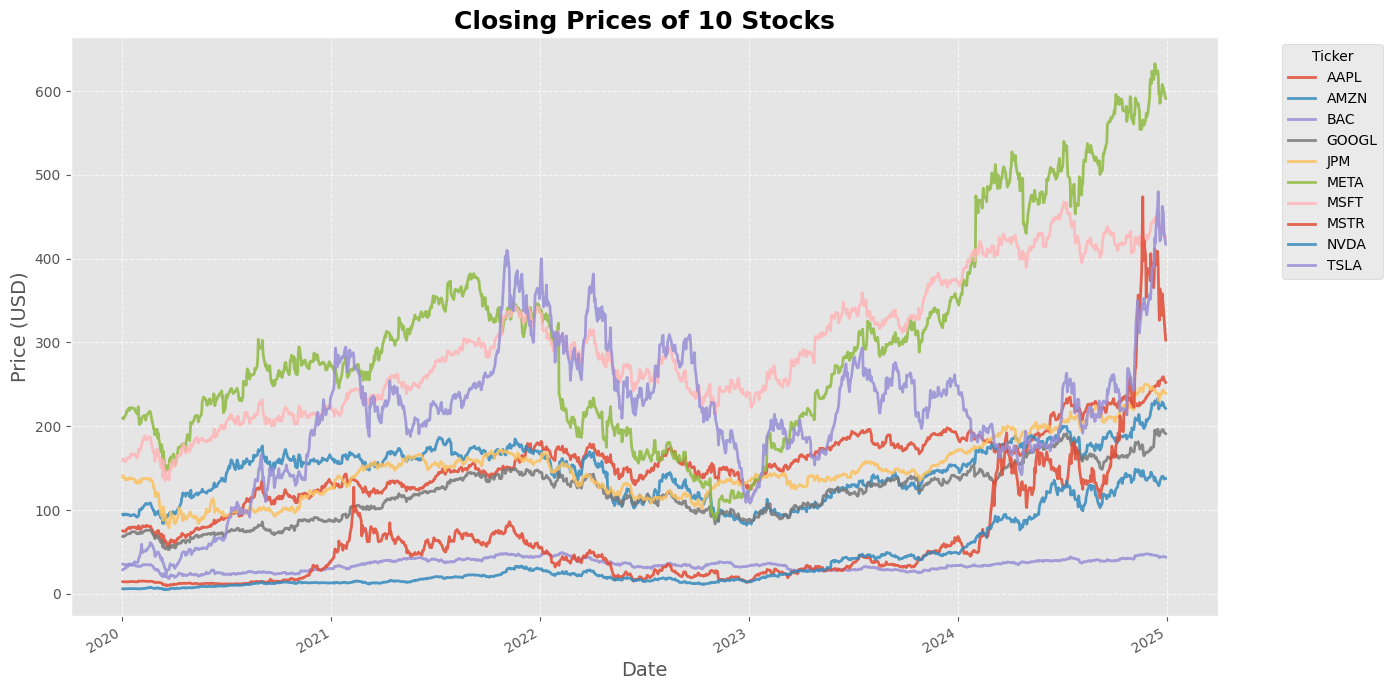

In [21]:
plt.figure(figsize=(14, 7))
pivot_df.plot(ax=plt.gca(), linewidth=2, alpha=0.85)
plt.title('Closing Prices of 10 Stocks', fontsize=18, fontweight='bold')
plt.ylabel('Price (USD)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Backtesting

The Bollinger Bands Mean Reversion Strategy is implemented for each stock. The Bollinger Band Mean Reversion Strategy includes the following:
- Calculate Bollinger Bands on closing prices, comprising of the middle band (20-day simple moving average), and the upper and lower bands (at 2 standard deviations from the middle band).
- Entry Signal:
    - Buy signal when asset's closing price falls below the Bollinger Band
    - Sell signal when asset's closing price exceeds the upper Bollinger Band
- Exit Signal:
    - Exit buy position when price rises back to middle band
    - Exit sell position when price decline back to the middle band

In [22]:
def bollinger_band(dfi):
    # Bollinger Bands calculation
    dfi["SMA"] = dfi["Close"].rolling(window=20).mean()
    dfi["Dev"] = dfi["Close"].rolling(window=20).std()
    dfi["HighBand"] = dfi["SMA"] + 2 * dfi["Dev"]
    dfi["MiddleBand"] = dfi["SMA"]
    dfi["LowBand"] = dfi["SMA"]  - 2 * dfi["Dev"]

    dfi["Signal"] = 0

    # Entry Signals
    dfi["Signal"] = np.where(dfi.LowBand > dfi.Close, 1, dfi.Signal)
    dfi["Signal"]= np.where(dfi.Close > dfi.HighBand, -1, dfi.Signal)

    # Exit Signals
    dfi["Signal"] = np.where((dfi.Signal.shift(1) == 1) & (dfi.Close >= dfi.SMA), 0, dfi.Signal)
    dfi["Signal"] = np.where((dfi.Signal.shift(1) == -1) & (dfi.Close <= dfi.SMA), 0, dfi.Signal)

    dfi["Signal"] = np.where(dfi.SMA.isna(), 0, dfi.Signal)

    dfi["Position"] = dfi.Signal.shift()

    return dfi


The simple daily return and the daily return of the Strategy are then calculated.

In [23]:
def strategy_returns(Close, signals):
    daily_ret = Close.pct_change().fillna(0)
    strat_ret = daily_ret * signals.shift(1).fillna(0)
    return daily_ret, strat_ret

results = {}

for ticker in tickers:
    ticker_df = df[df['Ticker'] == ticker].copy()
    strat = bollinger_band(ticker_df)
    daily_ret, strat_ret = strategy_returns(ticker_df['Close'], strat['Signal'])
    results[ticker] = {
        'daily_ret': daily_ret,
        'strat_ret': strat_ret,
        'cumulative_bh': (1 + daily_ret).cumprod() - 1,
        'cumulative_strat': (1 + strat_ret).cumprod() - 1
    }

The end-of-period cumulative return for the strategy vs buy and hold are displayed.

In [24]:
table_data = []

for ticker in tickers:

    bh_return = results[ticker]['cumulative_bh'].iloc[-1]
    strat_return = results[ticker]['cumulative_strat'].iloc[-1]
    
    table_data.append({
        'Ticker': ticker,
        'Buy+Hold Return (%)': bh_return * 100,
        'Strategy Return (%)': strat_return * 100
    })

# Convert to DataFrame
df_results = pd.DataFrame(table_data)

df_results['Buy+Hold Return (%)'] = df_results['Buy+Hold Return (%)'].round(2)
df_results['Strategy Return (%)'] = df_results['Strategy Return (%)'].round(2)

print(df_results)

  Ticker  Buy+Hold Return (%)  Strategy Return (%)
0   AAPL               235.87                17.96
1   MSFT               164.49                72.75
2   AMZN               133.19               -12.10
3   META               181.84                90.24
4   TSLA              1355.20               -85.62
5   NVDA              2192.36                37.63
6  GOOGL               179.45                46.89
7   MSTR              1999.37               -80.75
8    JPM                69.62                19.04
9    BAC                23.20               -30.21


## Portfolio Management

The correlation matrix of the simply daily return of the portfolio is visualised.

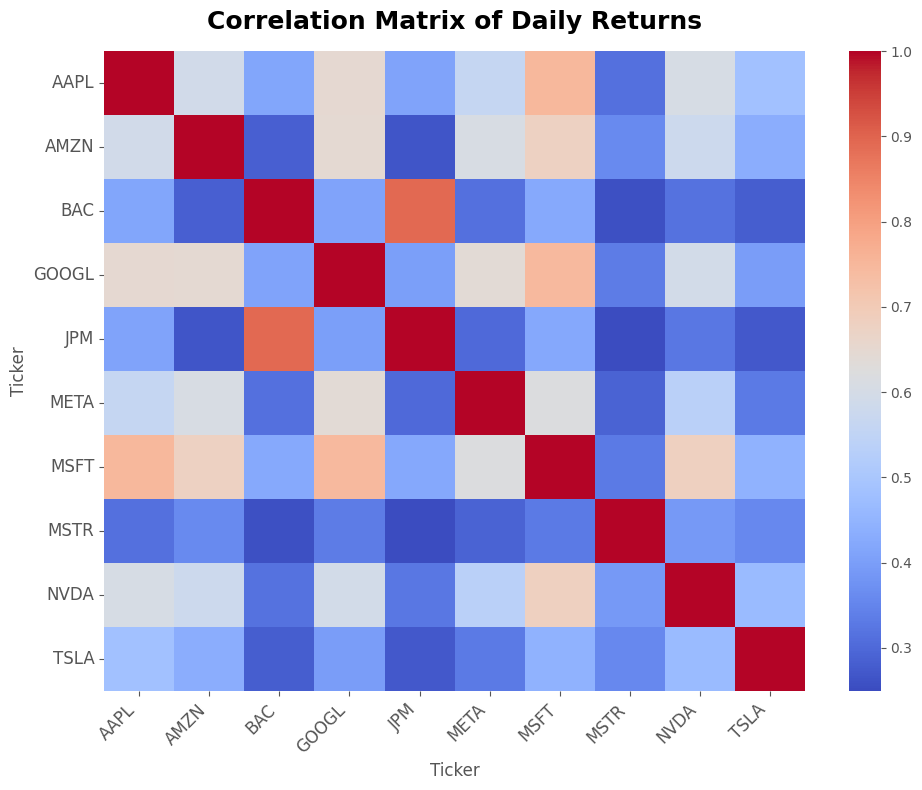

In [25]:
correlation_matrix = pivot_df.pct_change().corr()

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', ax=ax)

ax.set_title('Correlation Matrix of Daily Returns')
ax.set_title('Correlation Matrix of Daily Returns', fontsize=18, fontweight='bold', pad=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

A portfolio of the ten stockes with equal initial weights are created. The portfolio daily returns are displayed below.

In [26]:
pivot_df.index = pd.to_datetime(pivot_df.index, dayfirst=True)
pivot_df.sort_index(inplace=True)

pivot_df.iloc[:, 0:10]
df = pivot_df.loc[:, ["AAPL", "MSFT", "AMZN", "META", "TSLA", "NVDA", "GOOGL", "MSTR", "JPM", "BAC"]]

weights = np.ones(10) / 10

returns = df.pct_change()
returns.dropna(inplace=True)

p_returns = returns.dot(weights)
p_returns.name = "Portfolio Daily Returns"
p_returns


Date
2020-01-03   -0.007659
2020-01-06    0.009688
2020-01-07    0.001318
2020-01-08    0.010934
2020-01-09    0.005629
                ...   
2024-12-23    0.001112
2024-12-24    0.024258
2024-12-26   -0.007844
2024-12-27   -0.018103
2024-12-30   -0.018844
Name: Portfolio Daily Returns, Length: 1256, dtype: float64

Using the data of the portfolio daily returns, the cumulative return of the ten stock portfolio are shown in the table below and the end-of-period cumulative return are displayed.

In [27]:
cumulative_return = (1 + p_returns).cumprod() - 1
final_cumulative_return = cumulative_return.iloc[-1]
print(f"End-of-period Cumulative portfolio return: {final_cumulative_return: .2%}")
cumulative_return

End-of-period Cumulative portfolio return:  519.44%


Date
2020-01-03   -0.007659
2020-01-06    0.001955
2020-01-07    0.003275
2020-01-08    0.014245
2020-01-09    0.019954
                ...   
2024-12-23    5.327151
2024-12-24    5.480635
2024-12-26    5.429800
2024-12-27    5.313403
2024-12-30    5.194432
Name: Portfolio Daily Returns, Length: 1256, dtype: float64

The daily standard deviation of the portfolio returns are calculated and displayed as shown below.

In [35]:
p_std = p_returns.std()
print(f"Annualized Volatility: {p_std: .4}")

Annualized Volatility:  0.02014


## Portfolio Optimisation

Portfolio optimisation by maximising the Sharpe Ratio is implemented. The optimal weights of each stock are shown as a percentage, and corresponds to each stock in the following order Apple, Microsoft, Amazon, Meta, Tesla, Nvidia, Alphabet, Strategy, JP Morgan and Bank of America.

In [29]:
def negative_sharpe(weights):
    p_returns = np.dot(returns, weights)
    annualised_returns = p_returns.mean() * TRADING_DAYS
    annualised_volatility = p_returns.std() * np.sqrt(TRADING_DAYS)
    sharpe = (annualised_returns - RFR) / annualised_volatility

    return -sharpe

In [30]:
cons = {"type": "eq", "fun": lambda x: sum(x) - 1}

bounds = tuple((0, 1) for x in range(10))

init_weights = np.ones(10) / 10

optimal = minimize(negative_sharpe, init_weights, bounds=bounds, constraints=cons)
opt_weights = optimal.x
opt_weights * 100

array([9.39162141e-15, 0.00000000e+00, 2.66515259e-15, 3.98246839e-15,
       2.17596315e+01, 5.81625344e+01, 0.00000000e+00, 2.00778340e+01,
       0.00000000e+00, 9.09616457e-15])

The optimal portfolio weights are shown in percentage below

| Ticker | Weight (%) |
|--------|------------|
| AAPL | ~ 0.00 |
| MSFT | 0.00 |
| AMZN | ~ 0.00 |
| META | ~ 0.00 |
| TSLA | 21.76 |
| NVDA | 58.16 |
| GOOGL | 0.00 |
| MSTR | 20.08 |
| JPM | 0.00 |
| BAC | ~ 0.00 |

The cumulative daily return for the maximised Sharpe Ratio are displayed.

In [31]:
port_daily_returns_opt = returns.dot(opt_weights)
port_cumulative_daily_return_opt = (1 + port_daily_returns_opt).cumprod() -1
port_cumulative_daily_return_opt.name = "Returns for maximising the Sharpe Ratio Portfolio"
port_cumulative_daily_return_opt

Date
2020-01-03    -0.003891
2020-01-06     0.003659
2020-01-07     0.018670
2020-01-08     0.030460
2020-01-09     0.031819
                ...    
2024-12-23    31.501744
2024-12-24    32.606212
2024-12-26    32.114170
2024-12-27    31.140321
2024-12-30    30.446179
Name: Returns for maximising the Sharpe Ratio Portfolio, Length: 1256, dtype: float64

For the AI-generated portfolio optimisation, the Maximise return for Target Risk Strategy is implemented. This strategy is chosen due to its ability to achieve the highest possible expected return while ensuring that the portfolio's overall risk does not exceed a predefined threshold. The maximise return for Target Risk Strategy includes the following:
- Inputs: expected returns, covariance matrix of returns and the maximum allowed volatility
- Define the objective function which calculated the negative of the expected return of the portfolio
- Define the volatility constraint to ensure the portfolio's volatility stays below the target
- Define weight sum constraint to ensure the weights sum to 1
- Set Bounds and Initial Guess
- Run the optimisation and output the result

The optimal portfolio found by the Maximise return for Target Risk Strategy, the maximum expected return and the portfolio volatility are displayed below.

In [32]:
## Maximise return for Target Risk

target_volatility = 0.20
num_assets = len(pivot_df.columns)

# Calculate expected returns and covariance matrix
expected_returns = returns.mean() * TRADING_DAYS
cov_matrix = returns.cov() * TRADING_DAYS

# Objective Function: Negative Expected Return
def negative_portfolio_return(weights, expected_returns):
	return -np.dot(weights, expected_returns)

# Constraint: Portfolio volatility must be ≤ target
def volatility_constraint(weights, cov_matrix, target_volatility):
	portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
	return target_volatility - portfolio_volatility  # Must be ≥ 0

# Constraint: Weights must sum to 1
def weight_sum_constraint(weights):
	return np.sum(weights) - 1

# Bounds and Initial Guess
bounds = tuple((0, 1) for _ in range(num_assets))
initial_weights = np.array([1.0 / num_assets] * num_assets)

# Constraints Dictionary
constraints = [
	{'type': 'eq', 'fun': weight_sum_constraint},
	{'type': 'ineq', 'fun': lambda w: volatility_constraint(w, cov_matrix, target_volatility)}
]

# Run Optimisation
result = minimize(
	negative_portfolio_return,
	initial_weights,
	args=(expected_returns,),
	method='SLSQP',
	bounds=bounds,
	constraints=constraints
)

# Output Results
if result.success:
	optimal_weights = result.x
	max_return = -result.fun
	final_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
	print("Optimal Portfolio Weights:", optimal_weights)
	print("Maximum Expected Return (under target risk):", max_return)
	print("Portfolio Volatility:", final_volatility)
else:
	print("Optimization failed:", result.message)


Optimization failed: Iteration limit reached


The cumulative daily return of the Maximise Return for Target Risk Strategy are displayed.

In [33]:
port_daily_returns_opt_maxret = returns.dot(result.x)
port_cumulative_daily_return_opt_maxret = (1 + port_daily_returns_opt_maxret).cumprod() - 1
port_cumulative_daily_return_opt_maxret.name = "Maximise Return for Target Risk Portfolio Returns"
port_cumulative_daily_return_opt_maxret


Date
2020-01-03   -0.013688
2020-01-06   -0.006791
2020-01-07   -0.015527
2020-01-08   -0.007259
2020-01-09    0.002103
                ...   
2024-12-23    1.583925
2024-12-24    1.618631
2024-12-26    1.618228
2024-12-27    1.585955
2024-12-30    1.559685
Name: Maximise Return for Target Risk Portfolio Returns, Length: 1256, dtype: float64

A visual plot of three strategies:
- Cumulative Sharpe Ratio optimised portfolio returns
- Cumulative Maximum Return for Target Risk Strategy portfolio returns
- Cumulative initial (equal-weighting) portfolio returns

are shown below.

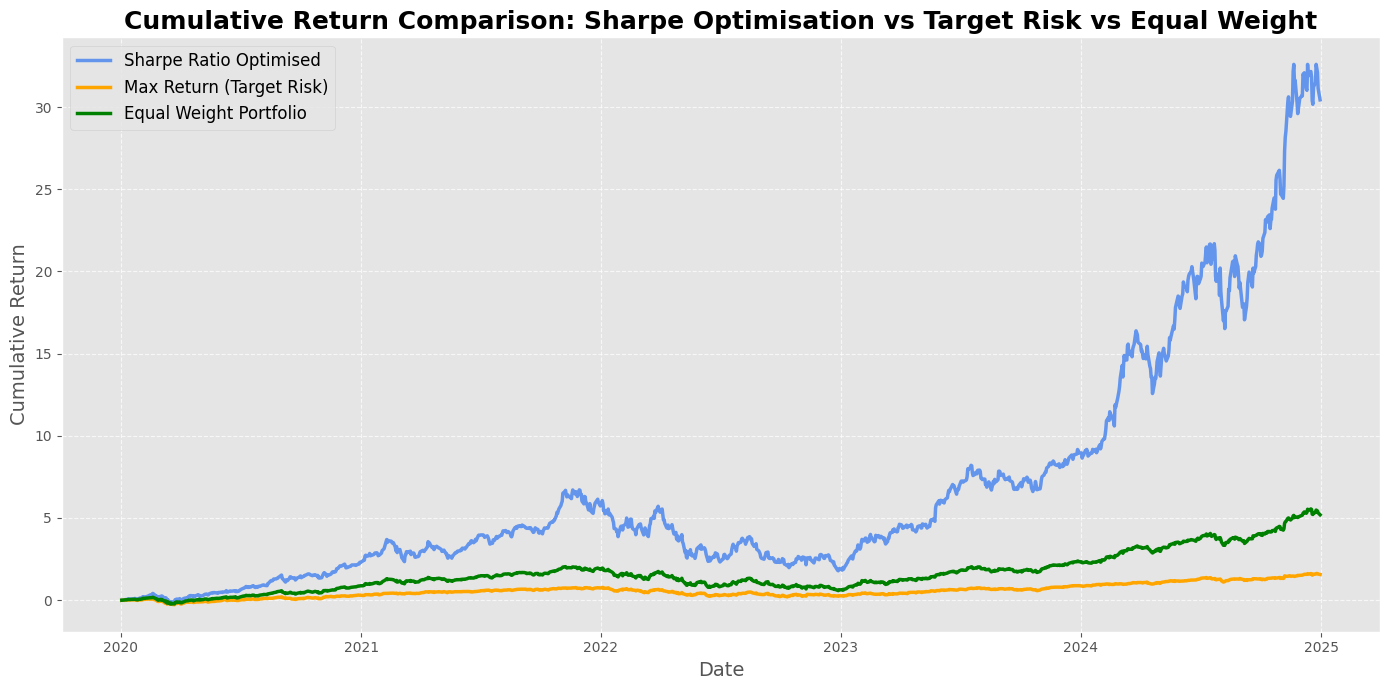

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(port_cumulative_daily_return_opt, label="Sharpe Ratio Optimised", linewidth=2.5, color="cornflowerblue")
plt.plot(port_cumulative_daily_return_opt_maxret, label="Max Return (Target Risk)", linewidth=2.5, color="orange")
plt.plot(cumulative_return, label="Equal Weight Portfolio", linewidth=2.5, color="green")

plt.title("Cumulative Return Comparison: Sharpe Optimisation vs Target Risk vs Equal Weight", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Return", fontsize=14)
plt.legend(fontsize=12, frameon=True, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the backtest and optimisation results, the recommended portfolio is the unconstrained Sharpe Ratio Optimised Portfolio. This portfolio allocation focuses heavily on stocks that delivered the highest historical risk-adjusted returns between 2020 and 2024. As shown in the Cumulative Return Comparision plot, this strategy resulted in a cumulative return of over 9 times the initial investment between 2020 and 2024, significantly outperforming both the equal-weighted portfolio and the target-risk portfolio during the same period. However, this outperformance strategy comes at the cost of high concentration risk, as the Sharpe Ratio Optimiser allocated almost the entire portfolio to just three stocks, Tesla, Nvidia and MicroStrategy.

The proposed optimal stock weights generated from the Sharpe Ratio Optimised Strategy are shown below:

| Ticker | Weight (%) |
|--------|------------|
| AAPL | ~ 0.00 |
| MSFT | 0.00 |
| AMZN | ~ 0.00 |
| META | ~ 0.00 |
| TSLA | 21.76 |
| NVDA | 58.16 |
| GOOGL | 0.00 |
| MSTR | 20.08 |
| JPM | 0.00 |
| BAC | ~ 0.00 |

The mean reversion strategy showed consistent results when compared to the Buy-and-Hold approach, but overall it underperformed in absolute terms. While META, MSFT, and GOOGL delivered the highest strategy returns of 90.24%, 72.75%, and 46.89% respectively under the mean reversion model, these figures still lagged far behind their corresponding Buy-and-Hold returns (181.84%, 164.49%, and 179.45% respectively). Furthermore, the mean reversion strategy performed particularly poorly for high-volatility stocks such as TSLA and MSTR, generating sharply negative returns of –85.62% and –80.75%, compared to very strong Buy-and-Hold returns of 1355.20% and 1999.37%. Based on these results, I would not recommend applying the mean reversion strategy to these stocks. Instead, a Buy-and-Hold approach appears more suitable, especially for high-growth and momentum-driven stocks in this portfolio.

Regarding the AI-generated code, I began by researching available portfolio optimisation strategies that could be implemented without introducing new Python packages. One method that stood out was the Maximise Return for Target Risk strategy, which aims to achieve the highest possible expected return while capping the portfolio’s total risk below a predefined threshold. I adapted and formatted the Copilot-generated code to match coding style presented in lecturs, making minor adjustments for readability and integration with the rest of the notebook.

In conclusion, the unconstrained Sharpe Ratio Optimised portfolio demonstrated outstanding historical returns during the backtest period. However, the extreme concentration risk, particularly the 58.16% weight in NVDA, 21.76% in Tesla and 20.08% in MSTR which exceeds acceptable limits for most institutional investors. Therefore, I recommend rerunning the optimisation with appropriate position caps, such as a 20-25% maximum weight per stock, before implementing this strategy in practice. This adjustment will help diversify the portfolio, reduce single-stock risk, and make the investment approach more suitable for real-world application.